# 

#            

### Matplotlib ###

In [1]:
import pandas as pd
import wbgapi as wb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 

In [60]:

# setting a PDF file directory to save the pdf file
pdf_dir = 'figure.pdf'

#defining student_name and student_id to add as a subtitle 

STUD_NM = 'Saad Shaikh'
STUD_ID = '20070328'

# 

In [166]:
indicator_ids_1 = ['SP.POP.TOTL.MA.ZS', 'SE.ADT.1524.LT.MA.ZS', 
                   'SH.HIV.1524.MA.ZS', 'SL.UEM.1524.MA.ZS']

country_codes = ['KEN', 'EGY', 'MAR']

# creating raw dataframe for storing new dataframe
raw_pop_dfs = wb.data.DataFrame(indicator_ids_1, country_codes, mrv=5)

#handling NA's by using.fillna() method
raw_pop_df = raw_pop_dfs.fillna(0)

raw_pop_df

YR2016     YR2017     YR2018     YR2019  \
economy series                                                             
EGY     SE.ADT.1524.LT.MA.ZS   0.000000  89.483383   0.000000   0.000000   
        SH.HIV.1524.MA.ZS      0.100000   0.100000   0.100000   0.100000   
        SL.UEM.1524.MA.ZS     30.841999  29.652000  18.187000  13.211000   
        SP.POP.TOTL.MA.ZS     50.535998  50.533457  50.530028  50.526518   
KEN     SE.ADT.1524.LT.MA.ZS   0.000000   0.000000  87.589996   0.000000   
        SH.HIV.1524.MA.ZS      1.500000   1.400000   1.300000   1.300000   
        SL.UEM.1524.MA.ZS      7.270000   8.663000  10.055000  11.519000   
        SP.POP.TOTL.MA.ZS     49.676841  49.680551  49.683980  49.686914   
MAR     SE.ADT.1524.LT.MA.ZS   0.000000   0.000000  98.040001   0.000000   
        SH.HIV.1524.MA.ZS      0.100000   0.100000   0.100000   0.100000   
        SL.UEM.1524.MA.ZS     22.238001  22.257999  22.406000  22.523001   
        SP.POP.TOTL.MA.ZS     49.565414  49.583951  49.596153  49.608409   

                                 YR2020  
economy series                           
EGY     SE.ADT.1524.LT.MA.ZS   0.000000  
        SH.HIV.1524.MA.ZS      0.100000  
        SL.UEM.1524.MA.ZS     15.209000  
        SP.POP.TOTL.MA.ZS     50.523441  
KEN     SE.ADT.1524.LT.MA.ZS   0.000000  
        SH.HIV.1524.MA.ZS      1.200000  
        SL.UEM.1524.MA.ZS     12.734000  
        SP.POP.TOTL.MA.ZS     49.689197  
MAR     SE.ADT.1524.LT.MA.ZS   0.000000  
        SH.HIV.1524.MA.ZS      0.100000  
        SL.UEM.1524.MA.ZS     26.254000  
        SP.POP.TOTL.MA.ZS     49.625061

# 

In [114]:

# renaming columns
raw_pop_df.columns = ['2016', '2017', '2018', '2019', '2020']

# creating a new column to store countries values
raw_pop_df['Countries'] = [i[0] for i in raw_pop_df.index]

# resetting dataframe index
raw_pop_df.index = [i[1] for i in raw_pop_df.index]

# replacing encoded values in index
old_indicators_list = [ 'SP.POP.TOTL.MA.ZS', 'SE.ADT.1524.LT.MA.ZS', 
                   'SH.HIV.1524.MA.ZS', 'SL.UEM.1524.MA.ZS' ]
new_indicators_list = [ 'Literacy rate, youth male', 
              'Prevalence of HIV, male', 'Unemployment, youth male',
              'Total Population, male']

for i in range(len(old_indicators_list)):
    raw_pop_df.index = raw_pop_df.index.str.replace(old_indicators_list[i],
                                                    new_indicators_list[i])

    
# reformatting the dataframe

# creating empty dataframe globally 
DF = pd.DataFrame()
for economy in raw_pop_df['Countries'].unique():
    
    # filtering raw dataframe to each Country (temporary dataframe)
    DF_country = raw_pop_df.loc[raw_pop_df['Countries']==economy]
    
    # filtering temporary dataframe columns
    DF_country = DF_country[['2016', '2017', '2018', '2019', '2020']]
    
    # transposing temporary dataframe
    DF_country = DF_country.transpose()
    
    # creating new columns for labelling of temporary dataframe
    DF_country['Countries'] = economy
    DF_country['Years'] = DF_country.index
    
    # reindexxing temporary dataframe
    DF_country.index = [i for i in range(len(DF_country))]
    
    # appending temporary dataframe to global dataframe
    DF = pd.concat([DF, DF_country])

    
# rearranging dataframe columns
DF = DF[[   'Countries', 'Years','Literacy rate, youth male',                  
              'Prevalence of HIV, male', 'Unemployment, youth male',       
              'Total Population, male'   
        ]]
        
DF

,Countries,Years,"Literacy rate, youth male","Prevalence of HIV, male","Unemployment, youth male","Total Population, male"
0,EGY,2016,50.535998,0.000000,0.1,30.841999
1,EGY,2017,50.533457,89.483383,0.1,29.652000
2,EGY,2018,50.530028,0.000000,0.1,18.187000
3,EGY,2019,50.526518,0.000000,0.1,13.211000
4,EGY,2020,50.523441,0.000000,0.1,15.209000
0,KEN,2016,49.676841,0.000000,1.5,7.270000
1,KEN,2017,49.680551,0.000000,1.4,8.663000
2,KEN,2018,49.683980,87.589996,1.3,10.055000
3,KEN,2019,49.686914,0.000000,1.3,11.519000
4,KEN,2020,49.689197,0.000000,1.2,12.734000


# 

In [192]:
#definig axes title so that it will be easy for next steps of code

def axes_title(title, xlabel, ylabel, i, legend_loc='lower right'):
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].legend(loc=legend_loc)

<ipython-input-197-3bef579c1e6d>:97: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[4].set_xticks(x_temp, list(['year']))
<ipython-input-197-3bef579c1e6d>:111: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[5].set_yticks(y_temp, list(DF_EGY['year']))


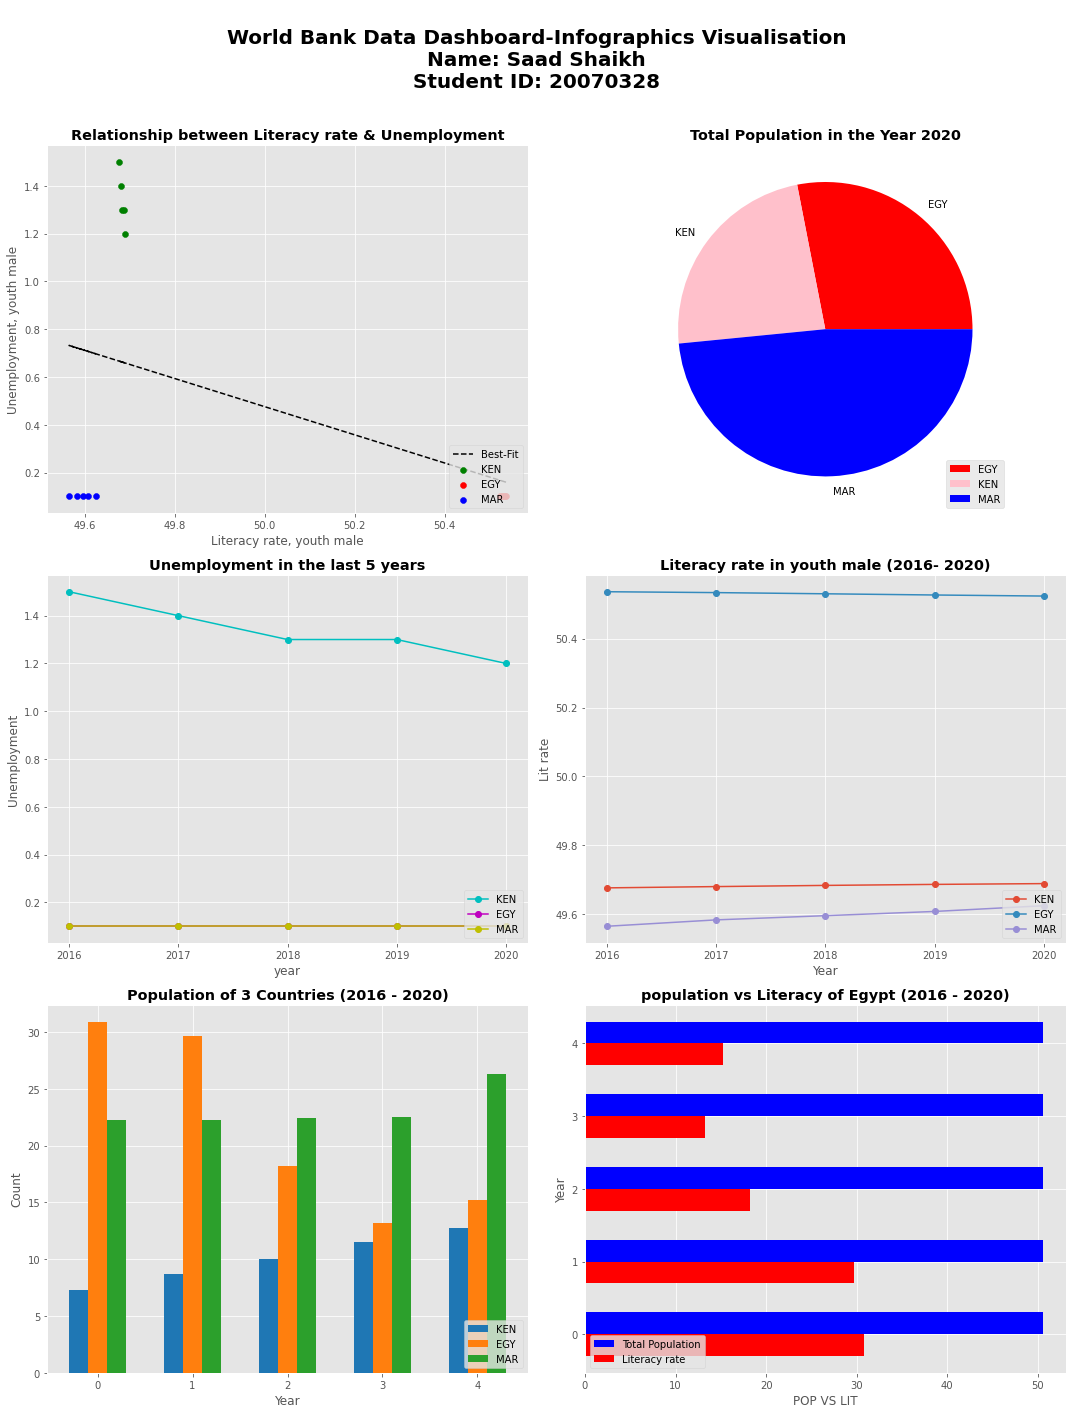

In [197]:
#defining fig and axes global use 
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

# defining_custom figure image style
plt.style.use('ggplot')

# seting main image title
fig_title = f''' 
World Bank Data Dashboard-Infographics Visualisation
Name: {STUD_NM}
Student ID: {STUD_ID}\n 
'''
fig.suptitle(fig_title, fontsize=20, fontweight='bold')

#creating temporary df's for each countries and assigning to their respective name
DF_KEN = df.loc[df['economy'] == 'KEN']
DF_EGY = df.loc[df['economy'] == 'EGY']
DF_MAR = df.loc[df['economy'] == 'MAR']


# chart 1: scatter plot to show the relationship between Literacy rate Unemployment among youth

# plotting values
axes[0].scatter(DF_KEN['Literacy rate, youth male'],
                DF_KEN['Unemployment, youth male'], label='KEN', color='g')
axes[0].scatter(DF_EGY['Literacy rate, youth male'],
                DF_EGY['Unemployment, youth male'], label='EGY', color='r')
axes[0].scatter(DF_MAR['Literacy rate, youth male'],
                DF_MAR['Unemployment, youth male'], label='MAR', color='b')

# creating best fit line using linear regression

model = LinearRegression()

# selecting training datasets & fitting model
x_train, y_train = DF[['Literacy rate, youth male']], DF['Unemployment, youth male']
model.fit(x_train, y_train)

# generating predictions
y_pred = model.predict(DF[['Literacy rate, youth male']])

# plotting the best fitting line
axes[0].plot(x_train, y_pred, label='Best-Fit', linestyle='--', color='black')
axes_title('Relationship between Literacy rate & Unemployment', 'Literacy rate, youth male',
           'Unemployment, youth male',0)



# chart 2: pie chart displaying total population in most recent years

#quering dataframe
DF_temp = df.loc[df['year']=='2020']

# plotting dataframe values
axes[1].pie(DF_temp['Total Population, male'], labels=DF_temp['economy'], colors = ['red', 'pink', 'blue'])
axes_title('Total Population in the Year 2020', None, None, 1)


# chart 3: line plot to display Unemployment among youth 

# plot dataframe values
axes[2].plot(DF_KEN['year'], DF_KEN['Unemployment, youth male'],
             label='KEN', color='c', marker='o')
axes[2].plot(DF_EGY['year'], DF_EGY['Unemployment, youth male'],
             label='EGY', color='m', marker='o')
axes[2].plot(DF_MAR['year'], DF_MAR['Unemployment, youth male'],
             label='MAR', color='y', marker='o')
axes_title('Unemployment in the last 5 years', 'year', 'Unemployment', 2)


# chart 4: line plot to display Literacy rate among youth

# plotting dataframe values
axes[3].plot(DF_KEN['year'], DF_KEN['Literacy rate, youth male'],
             label='KEN', color='C0', marker='o')
axes[3].plot(DF_EGY['year'], DF_EGY['Literacy rate, youth male'],
             label='EGY', color='C1', marker='o')
axes[3].plot(DF_MAR['year'], DF_MAR['Literacy rate, youth male'],
             label='MAR', color='C2', marker='o')
axes_title('Literacy rate in youth male (2016- 2020)', 'Year', 'Lit rate', 3)



# chart 5: bar plot to display total population of 3 countries

# multiple bar_graph plot settings
width, x_temp = 0.2, np.arange(len(DF_KEN))

# plotting dataframe values
axes[4].bar(x_temp - width, DF_KEN['Total Population, male'],
            label='KEN', color='#1f77b4', width=width)
axes[4].bar(x_temp , DF_EGY['Total Population, male'],
            label='EGY', color='#ff7f0e', width=width)
axes[4].bar(x_temp + width, DF_MAR['Total Population, male'],
            label='MAR', color='#2ca02c', width=width)
axes[4].set_xticks(x_temp, list(['year']))
axes_title('Population of 3 Countries (2016 - 2020)', 'Year', 'Count', 4, legend_loc='lower right')


# chart 6: horizontal bar plot displaying Total population and Literacy rate

# multiple bar plot settings
height, y_temp = 0.3, np.arange(len(DF_EGY))

# plotting dataframe values
axes[5].barh(y_temp + height/2, DF_EGY['Literacy rate, youth male'],
             label='Total Population', color='b', height=height)
axes[5].barh(y_temp - height/2, DF_EGY['Total Population, male'],
             label='Literacy rate', color='r', height=height)
axes[5].set_yticks(y_temp, list(DF_EGY['year']))
axes_title('population vs Literacy of Egypt (2016 - 2020)', 'POP VS LIT', 'Year', 5, legend_loc='lower left')

# saving image as PDF file
fig.tight_layout()
fig.savefig(pdf_dir)


### Visualization Story ###

This visualisation aims to show information from the most recent years of the world bank data. The indicators selected are Literacy rate, youth male, Prevalence of HIV, male, unemployment, youth male and Total Population, male.


There are total of six visualization graphs using pandas matplotlib and every graph shows a visualization of different data.


The first graph is a scatter plot to show the relationship between the Literacy rate and Unemployment among youth and on top of that I have used a linear regression model to show the best-fitted line among the three plots that indicate the relationship between Egypt and Morocco is best while Kenya’s relationship not that good with two other countries. 


The second graph is a pie-chart graph indicating the Total Population of three countries (Kenya, Egypt, Morocco). Morocco has almost more than half the population of two other countries which are Egypt and Kenya.


The third chart is the line plot indicating unemployment in the last five years. Kenya has seen a downward trend from 2016 to 2020, whereas Egypt and Morocco are constant throughout the span of five years


The fourth chart indicates the literacy rate among youth in the most recent five years (2016 - 2020). While Kenya and Morocco have seen an upward trend Egypt’s rates are slightly falling which is a good sign.


The fifth chart shows the population of the three countries from 2016 to 2020. While Egypt was the highest in 2016, the population had seen a downward trend till 2019 after which the trend started increasing again. Morocco has seen an increase in their population from 2016 to 2020 whereas Kenya has also seen a massive increase in their population. 


The last chart describes the comparison between the population and how many people are educated in the country of Egypt. In the year 2016 literacy rate was comparatively higher than in the rest of 4 years. The only year which has seen less literacy rate was 2019.